In [1]:
from bs4 import BeautifulSoup                   # for webscrapping
import requests                                 # to send requests
import pandas as pd                             # for data cleaning 
import numpy as np                              # for numerical analysis
import matplotlib.pyplot as plt                 # for visualization 
import seaborn as sns

Names = []
Rating = []
Review = []

In [2]:
url = """https://www.flipkart.com/apple-iphone-16-black-128-gb/product-reviews/itmb07d67f995271?pid=MOBH4DQFG8NKFRDY&lid=LSTMOBH4DQFG8NKFRDYNBDOZI&marketplace=FLIPKART"""

for i in range(1,30):
    np = url+"&page="+str(i)                   # this i will loop till 30 making it automate till 30th page
    r = requests.get(np)
    soup = BeautifulSoup(r.text,"html.parser") 
    
    name = soup.find_all("p",{"class":"_2NsDsF AwS1CA"}) # find_all will help in finding all the name with mentioned class
    for i in name:                                       # all these thing are getting appending into different list
        Names.append(i.text)

    rating = soup.find_all("div",{"class":"XQDdHH Ga3i8K"})
    for i  in rating:
        Rating.append(i.text)

    reviews = soup.find_all("div",{"class":"ZmyHeo"})
    for i in reviews:
        Review.append(i.text)

In [3]:
df1 = pd.DataFrame({"Name":Names,"Reviews":Review})       # converting raw data into dataframe
df1                                               

,Name,Reviews
0,Aryan Kumar,Loved itREAD MORE
1,Flipkart Customer,Super and cool photoREAD MORE
2,Amit Kumar Chaudhary,SatisfiedREAD MORE
3,Ravi Arya,I love it ❤️❤️READ MORE
4,Disha Singh,Doing good as of now!READ MORE
...,...,...
285,Abhishek Salian,"Not good , please go for Samsung if you are ab..."
286,Rahul Mondol,"Fiirst time screen was so smooth,,but now,,so ..."
287,Corporate Kanya,Very niceREAD MORE
288,Kishan Sarkar,Good protectREAD MORE


In [4]:
Data = pd.DataFrame({"Ratings":Rating})    # seperately converting into dataframe due to array mismatch issue
Data

,Ratings
0,5
1,5
2,5
3,5
4,5
...,...
275,5
276,5
277,5
278,5


In [5]:
df = pd.concat([df1,Data],axis = 1)        # merging both the data frames using concat function 
df

,Name,Reviews,Ratings
0,Aryan Kumar,Loved itREAD MORE,5
1,Flipkart Customer,Super and cool photoREAD MORE,5
2,Amit Kumar Chaudhary,SatisfiedREAD MORE,5
3,Ravi Arya,I love it ❤️❤️READ MORE,5
4,Disha Singh,Doing good as of now!READ MORE,5
...,...,...,...
285,Abhishek Salian,"Not good , please go for Samsung if you are ab...",NaN
286,Rahul Mondol,"Fiirst time screen was so smooth,,but now,,so ...",NaN
287,Corporate Kanya,Very niceREAD MORE,NaN
288,Kishan Sarkar,Good protectREAD MORE,NaN


In [6]:
df = df[["Name","Ratings","Reviews"]]         # rearranging the column for better analysis
df

,Name,Ratings,Reviews
0,Aryan Kumar,5,Loved itREAD MORE
1,Flipkart Customer,5,Super and cool photoREAD MORE
2,Amit Kumar Chaudhary,5,SatisfiedREAD MORE
3,Ravi Arya,5,I love it ❤️❤️READ MORE
4,Disha Singh,5,Doing good as of now!READ MORE
...,...,...,...
285,Abhishek Salian,NaN,"Not good , please go for Samsung if you are ab..."
286,Rahul Mondol,NaN,"Fiirst time screen was so smooth,,but now,,so ..."
287,Corporate Kanya,NaN,Very niceREAD MORE
288,Kishan Sarkar,NaN,Good protectREAD MORE


# Removing Duplicates


In [7]:
df = df = df.drop_duplicates().reset_index(drop=True)     # removing duplicates with duplicated function and reset the index at the same time
df

,Name,Ratings,Reviews
0,Aryan Kumar,5,Loved itREAD MORE
1,Flipkart Customer,5,Super and cool photoREAD MORE
2,Amit Kumar Chaudhary,5,SatisfiedREAD MORE
3,Ravi Arya,5,I love it ❤️❤️READ MORE
4,Disha Singh,5,Doing good as of now!READ MORE
...,...,...,...
283,Abhishek Salian,NaN,"Not good , please go for Samsung if you are ab..."
284,Rahul Mondol,NaN,"Fiirst time screen was so smooth,,but now,,so ..."
285,Corporate Kanya,NaN,Very niceREAD MORE
286,Kishan Sarkar,NaN,Good protectREAD MORE


# Remove irrelevant characters (e.g., special characters, punctuation, and extra spaces).

In [8]:
def text_selector(string):                       # created a function to remove all special charaters by keeping only aplphanumeric words only
    new_st = ""
    for char in string:
        if char in "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789 ":
            new_st = new_st + char
    return new_st
    

In [9]:
df['Reviews'] = df['Reviews'].apply(func= text_selector)  # applying the function over reviews column 
df

,Name,Ratings,Reviews
0,Aryan Kumar,5,Loved itREAD MORE
1,Flipkart Customer,5,Super and cool photoREAD MORE
2,Amit Kumar Chaudhary,5,SatisfiedREAD MORE
3,Ravi Arya,5,I love it READ MORE
4,Disha Singh,5,Doing good as of nowREAD MORE
...,...,...,...
283,Abhishek Salian,NaN,Not good please go for Samsung if you are abl...
284,Rahul Mondol,NaN,Fiirst time screen was so smoothbut nowso badR...
285,Corporate Kanya,NaN,Very niceREAD MORE
286,Kishan Sarkar,NaN,Good protectREAD MORE


In [10]:
df["Reviews"] = df["Reviews"].str.replace("READ MORE","")   # replcing READ MORE with null as a part of cleaning 
df

,Name,Ratings,Reviews
0,Aryan Kumar,5,Loved it
1,Flipkart Customer,5,Super and cool photo
2,Amit Kumar Chaudhary,5,Satisfied
3,Ravi Arya,5,I love it
4,Disha Singh,5,Doing good as of now
...,...,...,...
283,Abhishek Salian,NaN,Not good please go for Samsung if you are abl...
284,Rahul Mondol,NaN,Fiirst time screen was so smoothbut nowso bad
285,Corporate Kanya,NaN,Very nice
286,Kishan Sarkar,NaN,Good protect


# Tokenize the text into individual words.


In [11]:
df["tokenize"] = df["Reviews"].str.split()   # creating new column and sperating each words in a list fromat to perform analysis
df


,Name,Ratings,Reviews,tokenize
0,Aryan Kumar,5,Loved it,"[Loved, it]"
1,Flipkart Customer,5,Super and cool photo,"[Super, and, cool, photo]"
2,Amit Kumar Chaudhary,5,Satisfied,[Satisfied]
3,Ravi Arya,5,I love it,"[I, love, it]"
4,Disha Singh,5,Doing good as of now,"[Doing, good, as, of, now]"
...,...,...,...,...
283,Abhishek Salian,NaN,Not good please go for Samsung if you are abl...,"[Not, good, please, go, for, Samsung, if, you,..."
284,Rahul Mondol,NaN,Fiirst time screen was so smoothbut nowso bad,"[Fiirst, time, screen, was, so, smoothbut, now..."
285,Corporate Kanya,NaN,Very nice,"[Very, nice]"
286,Kishan Sarkar,NaN,Good protect,"[Good, protect]"


# Remove stop words (commonly used words that do not add significant meaning to sentiment analysis).


In [12]:
words = {"the", "is", "and", "a", "an", "of", "to", "in", "it", "for", "on", "with", "as", "at", "by", "this", "that", "you"}

df["clean_token"] = df["tokenize"].apply(
    lambda tokens: [word for word in tokens if word.lower() not in words]
)     # removing comkmonly connectors with the help of lambda function 


In [13]:
df

,Name,Ratings,Reviews,tokenize,clean_token
0,Aryan Kumar,5,Loved it,"[Loved, it]",[Loved]
1,Flipkart Customer,5,Super and cool photo,"[Super, and, cool, photo]","[Super, cool, photo]"
2,Amit Kumar Chaudhary,5,Satisfied,[Satisfied],[Satisfied]
3,Ravi Arya,5,I love it,"[I, love, it]","[I, love]"
4,Disha Singh,5,Doing good as of now,"[Doing, good, as, of, now]","[Doing, good, now]"
...,...,...,...,...,...
283,Abhishek Salian,NaN,Not good please go for Samsung if you are abl...,"[Not, good, please, go, for, Samsung, if, you,...","[Not, good, please, go, Samsung, if, are, able..."
284,Rahul Mondol,NaN,Fiirst time screen was so smoothbut nowso bad,"[Fiirst, time, screen, was, so, smoothbut, now...","[Fiirst, time, screen, was, so, smoothbut, now..."
285,Corporate Kanya,NaN,Very nice,"[Very, nice]","[Very, nice]"
286,Kishan Sarkar,NaN,Good protect,"[Good, protect]","[Good, protect]"


# Perform lemmatization to convert words into their base form (e.g., "running" → "run").

In [14]:
import spacy

In [15]:
nlp = spacy.load("en_core_web_sm")      # with the help of AI tools learning about this library and trying to implement this for lemmatization

df["lemmatized_tokens"] = df["clean_token"].apply(
    lambda tokens: [token.lemma_ for token in nlp(" ".join(tokens))]
)


In [16]:
df

,Name,Ratings,Reviews,tokenize,clean_token,lemmatized_tokens
0,Aryan Kumar,5,Loved it,"[Loved, it]",[Loved],[love]
1,Flipkart Customer,5,Super and cool photo,"[Super, and, cool, photo]","[Super, cool, photo]","[super, cool, photo]"
2,Amit Kumar Chaudhary,5,Satisfied,[Satisfied],[Satisfied],[satisfy]
3,Ravi Arya,5,I love it,"[I, love, it]","[I, love]","[I, love]"
4,Disha Singh,5,Doing good as of now,"[Doing, good, as, of, now]","[Doing, good, now]","[do, good, now]"
...,...,...,...,...,...,...
283,Abhishek Salian,NaN,Not good please go for Samsung if you are abl...,"[Not, good, please, go, for, Samsung, if, you,...","[Not, good, please, go, Samsung, if, are, able...","[not, good, please, go, Samsung, if, be, able,..."
284,Rahul Mondol,NaN,Fiirst time screen was so smoothbut nowso bad,"[Fiirst, time, screen, was, so, smoothbut, now...","[Fiirst, time, screen, was, so, smoothbut, now...","[fiirst, time, screen, be, so, smoothbut, nows..."
285,Corporate Kanya,NaN,Very nice,"[Very, nice]","[Very, nice]","[very, nice]"
286,Kishan Sarkar,NaN,Good protect,"[Good, protect]","[Good, protect]","[good, protect]"


# 3. Sentiment Analysis:

In [17]:
from textblob import TextBlob     # it is used for snetimenta analysis where polarity is from -1 to 1 AND subjectivy is from o to 1

In [18]:
df["polarity"] = df["lemmatized_tokens"].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.polarity)
df["subjectivity"] = df["lemmatized_tokens"].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.subjectivity)

In [19]:
df

,Name,Ratings,Reviews,tokenize,clean_token,lemmatized_tokens,polarity,subjectivity
0,Aryan Kumar,5,Loved it,"[Loved, it]",[Loved],[love],0.500000,0.600000
1,Flipkart Customer,5,Super and cool photo,"[Super, and, cool, photo]","[Super, cool, photo]","[super, cool, photo]",0.341667,0.658333
2,Amit Kumar Chaudhary,5,Satisfied,[Satisfied],[Satisfied],[satisfy],0.000000,0.000000
3,Ravi Arya,5,I love it,"[I, love, it]","[I, love]","[I, love]",0.500000,0.600000
4,Disha Singh,5,Doing good as of now,"[Doing, good, as, of, now]","[Doing, good, now]","[do, good, now]",0.700000,0.600000
...,...,...,...,...,...,...,...,...
283,Abhishek Salian,NaN,Not good please go for Samsung if you are abl...,"[Not, good, please, go, for, Samsung, if, you,...","[Not, good, please, go, Samsung, if, are, able...","[not, good, please, go, Samsung, if, be, able,...",0.075000,0.612500
284,Rahul Mondol,NaN,Fiirst time screen was so smoothbut nowso bad,"[Fiirst, time, screen, was, so, smoothbut, now...","[Fiirst, time, screen, was, so, smoothbut, now...","[fiirst, time, screen, be, so, smoothbut, nows...",-0.700000,0.666667
285,Corporate Kanya,NaN,Very nice,"[Very, nice]","[Very, nice]","[very, nice]",0.780000,1.000000
286,Kishan Sarkar,NaN,Good protect,"[Good, protect]","[Good, protect]","[good, protect]",0.700000,0.600000


In [20]:
df["sentiment"] = df["polarity"].apply(lambda score: "Positive" if score >= 0.2 else "Negative") # differentiating based on ploarity

In [36]:
df.tail(50)

,Name,Ratings,Reviews,tokenize,clean_token,lemmatized_tokens,polarity,subjectivity,sentiment,review_length
238,Mayank Rohilla,4,Overall value for money,"[Overall, value, for, money]","[Overall, value, money]","[overall, value, money]",0.000000,0.000000,Negative,4
239,Porus Mehta,5,Product is awesome,"[Product, is, awesome]","[Product, awesome]","[product, awesome]",1.000000,1.000000,Positive,3
240,kousik bera,3,Good,[Good],[Good],[good],0.700000,0.600000,Positive,1
241,Sanjay Devnath Rajbhar,4,It good for 3 days I will watch one year than ...,"[It, good, for, 3, days, I, will, watch, one, ...","[good, 3, days, I, will, watch, one, year, tha...","[good, 3, day, I, will, watch, one, year, than...",0.700000,0.600000,Positive,12
242,AKASH KUMAR,5,iPhone 16 is the best quality and camera quali...,"[iPhone, 16, is, the, best, quality, and, came...","[iPhone, 16, best, quality, camera, quality, b...","[iPhone, 16, good, quality, camera, quality, w...",0.700000,0.600000,Positive,13
243,MOHIT HEMANT,5,I am not satisfied I am a big fan oneplus mobi...,"[I, am, not, satisfied, I, am, a, big, fan, on...","[I, am, not, satisfied, I, am, big, fan, onepl...","[I, be, not, satisfied, I, be, big, fan, onepl...",-0.125000,0.550000,Negative,12
244,Sohel Katherayi,5,Good,[Good],[Good],[good],0.700000,0.600000,Positive,1
245,puken eru,5,Good,[Good],[Good],[good],0.700000,0.600000,Positive,1
246,Abhaya Pradhan,5,Just like a Wow,"[Just, like, a, Wow]","[Just, like, Wow]","[just, like, wow]",0.100000,1.000000,Negative,4
247,Naman Panwar,5,Just love my first Iphone,"[Just, love, my, first, Iphone]","[Just, love, my, first, Iphone]","[just, love, my, first, iphone]",0.375000,0.466667,Positive,5


 # 4. Data Analysis and Insights:

Sentiment Distribution: Calculate the overall distribution of positive and negative sentiments for the 300 reviews.

In [22]:
sentiment_counts = df["sentiment"].value_counts()   # counting the values of sentiments and representing with the help of bar chart

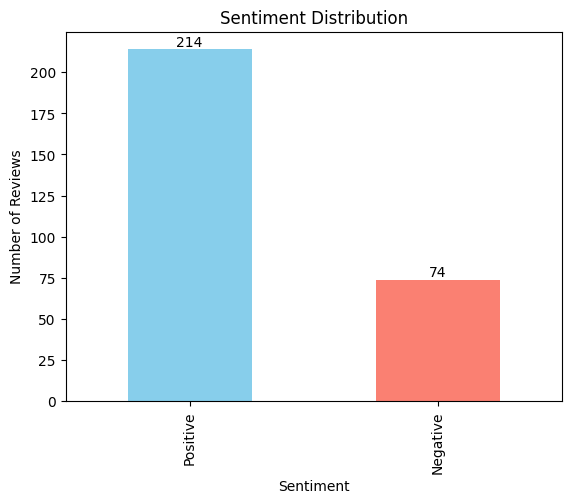

In [23]:
ax = sentiment_counts.plot(kind="bar", color=["skyblue", "salmon"])
ax.bar_label(ax.containers[0])  # This adds the numbers automatically
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

Average Rating vs Sentiment: Analyze if there is any correlation between the numeric ratings (1-5 stars) and sentiment polarity. Do higher ratings correspond with more positive sentiments?

In [24]:
avg_polarity = df.groupby('Ratings', as_index=False)['polarity'].mean()
avg_polarity = avg_polarity.sort_values(by='Ratings')           # calculating the average polarity and representing over the line chart 
avg_polarity

,Ratings,polarity
0,3,0.413524
1,4,0.501604
2,5,0.444897


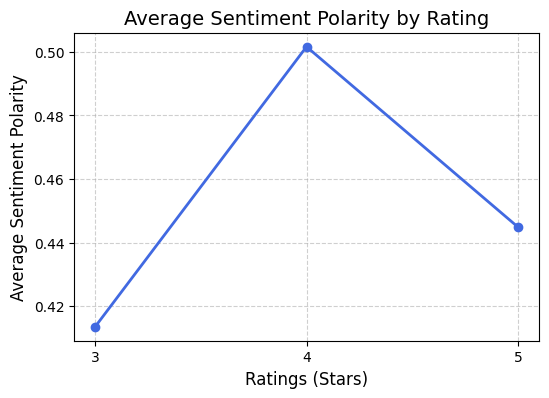

In [27]:
plt.figure(figsize=(6,4))
plt.plot(avg_polarity['Ratings'], avg_polarity['polarity'], marker='o', color='royalblue', linewidth=2)
plt.title('Average Sentiment Polarity by Rating', fontsize=14)
plt.xlabel('Ratings (Stars)', fontsize=12)
plt.ylabel('Average Sentiment Polarity', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

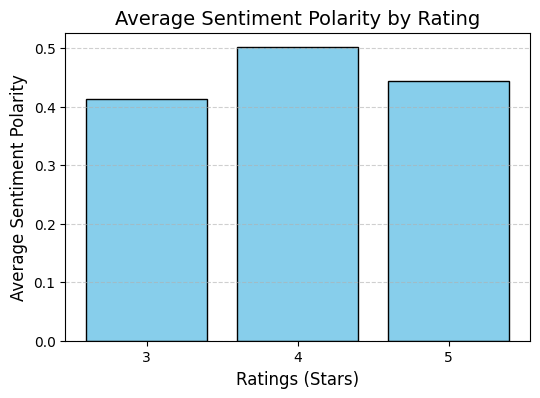

In [28]:
plt.figure(figsize=(6,4))
plt.bar(avg_polarity['Ratings'], avg_polarity['polarity'], color='skyblue', edgecolor='black')
plt.title('Average Sentiment Polarity by Rating', fontsize=14)
plt.xlabel('Ratings (Stars)', fontsize=12)
plt.ylabel('Average Sentiment Polarity', fontsize=12)
plt.xticks(avg_polarity['Ratings'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Review Length Analysis: Investigate if longer reviews are associated with more detailed sentiments, either positive or negative.

In [30]:
df['review_length'] = df['Reviews'].apply(lambda x: len(str(x).split()))  # couting the lenght of reviews and representing with the help of scatter plot

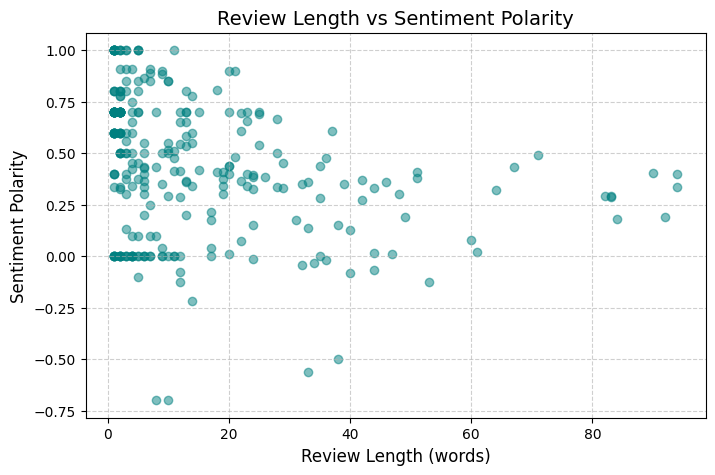

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(df['review_length'], df['polarity'], alpha=0.5, color='teal')
plt.title('Review Length vs Sentiment Polarity', fontsize=14)
plt.xlabel('Review Length (words)', fontsize=12)
plt.ylabel('Sentiment Polarity', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Reporting

1.overview

Cleaning steps:
Removed duplicate entries and missing reviews.
Tokenized and cleaned text to remove stopwords, punctuation, and special characters.
Applied lemmatization for consistent word forms.
Calculated polarity (−1 to 1) and subjectivity (0 to 1) using sentiment analysis.
Classified reviews as Positive, Negative, or Neutral based on polarity thresholds.

2.Sentiment Analysis Results: Distribution of positive/negative reviews, average sentiment per rating, etc.

In [34]:
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']
sentiment_counts['Percentage'] = (sentiment_counts['Count'] / sentiment_counts['Count'].sum() * 100).round(2)
sentiment_counts

,Sentiment,Count,Percentage
0,Positive,214,74.31
1,Negative,74,25.69


3.Insights: Key trends from the sentiment analysis, such as common issues with the product or positive highlights.

Positive Highlights

Words like good, awesome, worth the money, and beautiful appeared frequently in positive reviews.
Many customers liked its design
Several customer are also praised its delivery standards for product safety

Negative Highlights 

Bluetooth connectivity issue and Battery performance are the major highlighted issue in negatives.
several customers facing overheating issue
it price range makes it accessible to only elite customers.




4.Recommendations

Based on the customers reviews
1 Battery performance
2.Overheating issue
3.Bluetooth connectivity issue 
Are the areas where company needs to work proactively.
    
In order to expand its market share company needs to be more accomodate towards people with lower strata as well by normalizing its price range and easy 
EMIs options.
    
Company need to highlight its positivity via social marketing tactics aligned with meme tacticts to grab the attention of younger youth.
organizing several events to check and test its effectivtiy and security by inviting several coders thorughout the world to challenge its claims
which helps in gaining people trust over this product.

Detailed scrutiny of all the negative reviews and try to connect with the user to got the better insights about issue and fix it.

